In [ ]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, homogeneity_score, completeness_score, v_measure_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df=pd.read_csv('/content/fetal_health.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000,0.500000,43.000000,...,62.000000,126.000000,2.000000,0.000000,120.000000,137.000000,121.000000,73.000000,1.000000,2.000000
1,132.000000,0.006000,0.000000,0.006000,0.003000,0.000000,0.000000,17.000000,2.100000,0.000000,...,68.000000,198.000000,6.000000,1.000000,141.000000,136.000000,140.000000,12.000000,0.000000,1.000000
2,133.000000,0.003000,0.000000,0.008000,0.003000,0.000000,0.000000,16.000000,2.100000,0.000000,...,68.000000,198.000000,5.000000,1.000000,141.000000,135.000000,138.000000,13.000000,0.000000,1.000000
3,134.000000,0.003000,0.000000,0.008000,0.003000,0.000000,0.000000,16.000000,2.400000,0.000000,...,53.000000,170.000000,11.000000,0.000000,137.000000,134.000000,137.000000,13.000000,1.000000,1.000000
4,132.000000,0.007000,0.000000,0.008000,0.000000,0.000000,0.000000,16.000000,2.400000,0.000000,...,53.000000,170.000000,9.000000,0.000000,137.000000,136.000000,138.000000,11.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.000000,0.007000,0.000000,0.000000,0.000000,79.000000,0.200000,25.000000,...,137.000000,177.000000,4.000000,0.000000,153.000000,150.000000,152.000000,2.000000,0.000000,2.000000
2122,140.000000,0.001000,0.000000,0.007000,0.000000,0.000000,0.000000,78.000000,0.400000,22.000000,...,103.000000,169.000000,6.000000,0.000000,152.000000,148.000000,151.000000,3.000000,1.000000,2.000000
2123,140.000000,0.001000,0.000000,0.007000,0.000000,0.000000,0.000000,79.000000,0.400000,20.000000,...,103.000000,170.000000,5.000000,0.000000,153.000000,148.000000,152.000000,4.000000,1.000000,2.000000
2124,140.000000,0.001000,0.000000,0.006000,0.000000,0.000000,0.000000,78.000000,0.400000,27.000000,...,103.000000,169.000000,6.000000,0.000000,152.000000,147.000000,151.000000,4.000000,1.000000,2.000000


In [ ]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000,0.500000,43.000000,...,62.000000,126.000000,2.000000,0.000000,120.000000,137.000000,121.000000,73.000000,1.000000,2.000000
1,132.000000,0.006000,0.000000,0.006000,0.003000,0.000000,0.000000,17.000000,2.100000,0.000000,...,68.000000,198.000000,6.000000,1.000000,141.000000,136.000000,140.000000,12.000000,0.000000,1.000000
2,133.000000,0.003000,0.000000,0.008000,0.003000,0.000000,0.000000,16.000000,2.100000,0.000000,...,68.000000,198.000000,5.000000,1.000000,141.000000,135.000000,138.000000,13.000000,0.000000,1.000000
3,134.000000,0.003000,0.000000,0.008000,0.003000,0.000000,0.000000,16.000000,2.400000,0.000000,...,53.000000,170.000000,11.000000,0.000000,137.000000,134.000000,137.000000,13.000000,1.000000,1.000000
4,132.000000,0.007000,0.000000,0.008000,0.000000,0.000000,0.000000,16.000000,2.400000,0.000000,...,53.000000,170.000000,9.000000,0.000000,137.000000,136.000000,138.000000,11.000000,1.000000,1.000000


In [ ]:
df.tail()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2121,140.000000,0.000000,0.000000,0.007000,0.000000,0.000000,0.000000,79.000000,0.200000,25.000000,...,137.000000,177.000000,4.000000,0.000000,153.000000,150.000000,152.000000,2.000000,0.000000,2.000000
2122,140.000000,0.001000,0.000000,0.007000,0.000000,0.000000,0.000000,78.000000,0.400000,22.000000,...,103.000000,169.000000,6.000000,0.000000,152.000000,148.000000,151.000000,3.000000,1.000000,2.000000
2123,140.000000,0.001000,0.000000,0.007000,0.000000,0.000000,0.000000,79.000000,0.400000,20.000000,...,103.000000,170.000000,5.000000,0.000000,153.000000,148.000000,152.000000,4.000000,1.000000,2.000000
2124,140.000000,0.001000,0.000000,0.006000,0.000000,0.000000,0.000000,78.000000,0.400000,27.000000,...,103.000000,169.000000,6.000000,0.000000,152.000000,147.000000,151.000000,4.000000,1.000000,2.000000
2125,142.000000,0.002000,0.002000,0.008000,0.000000,0.000000,0.000000,74.000000,0.400000,36.000000,...,117.000000,159.000000,2.000000,1.000000,145.000000,143.000000,145.000000,1.000000,0.000000,1.000000


In [ ]:
df.shape

(2126, 22)

In [ ]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [ ]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.846660,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.396880,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.000000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
df.isna().sum()

,0
baseline value,0
accelerations,0
fetal_movement,0
uterine_contractions,0
light_decelerations,0
severe_decelerations,0
prolongued_decelerations,0
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0


In [ ]:
df['fetal_health'].value_counts()
# 1 - Normal 2 - Suspect 3 - Pathological

,count
fetal_health,
1.000000,1655
2.000000,295
3.000000,176


In [ ]:
df['severe_decelerations'].value_counts()

,count
severe_decelerations,
0.000000,2119
0.001000,7


In [ ]:
df['prolongued_decelerations'].value_counts()

,count
prolongued_decelerations,
0.000000,1948
0.002000,72
0.001000,70
0.003000,24
0.004000,9
0.005000,3


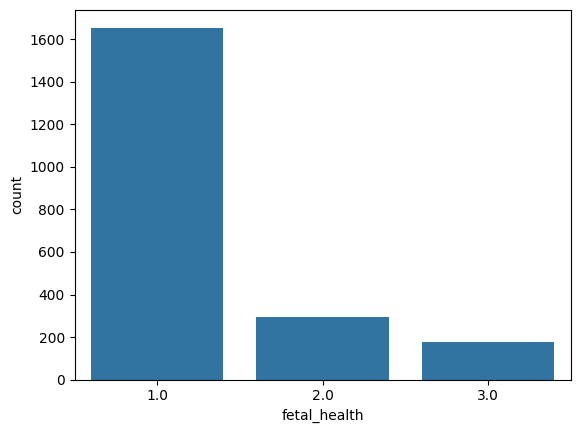

In [ ]:
# importing the required library

import seaborn as sns
import matplotlib.pyplot as plt
# count plot on single categorical variable
sns.countplot(df,x ='fetal_health')

# Show the plot
plt.show()


In [ ]:
correlation = df.corr()['fetal_health'].sort_values()
print(correlation)

accelerations                                            -0.364066
histogram_mode                                           -0.250412
histogram_mean                                           -0.226985
mean_value_of_long_term_variability                      -0.226797
histogram_median                                         -0.205033
uterine_contractions                                     -0.204894
histogram_tendency                                       -0.131976
mean_value_of_short_term_variability                     -0.103382
histogram_width                                          -0.068789
histogram_max                                            -0.045265
histogram_number_of_peaks                                -0.023666
histogram_number_of_zeroes                               -0.016682
light_decelerations                                       0.058870
histogram_min                                             0.063175
fetal_movement                                            0.08

In [ ]:
x=df.drop(['fetal_health'],axis=1)
y=df['fetal_health']
x.head()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000,0.500000,43.000000,...,64.000000,62.000000,126.000000,2.000000,0.000000,120.000000,137.000000,121.000000,73.000000,1.000000
1,132.000000,0.006000,0.000000,0.006000,0.003000,0.000000,0.000000,17.000000,2.100000,0.000000,...,130.000000,68.000000,198.000000,6.000000,1.000000,141.000000,136.000000,140.000000,12.000000,0.000000
2,133.000000,0.003000,0.000000,0.008000,0.003000,0.000000,0.000000,16.000000,2.100000,0.000000,...,130.000000,68.000000,198.000000,5.000000,1.000000,141.000000,135.000000,138.000000,13.000000,0.000000
3,134.000000,0.003000,0.000000,0.008000,0.003000,0.000000,0.000000,16.000000,2.400000,0.000000,...,117.000000,53.000000,170.000000,11.000000,0.000000,137.000000,134.000000,137.000000,13.000000,1.000000
4,132.000000,0.007000,0.000000,0.008000,0.000000,0.000000,0.000000,16.000000,2.400000,0.000000,...,117.000000,53.000000,170.000000,9.000000,0.000000,137.000000,136.000000,138.000000,11.000000,1.000000


In [ ]:
y.head()

,fetal_health
0,2.000000
1,1.000000
2,1.000000
3,1.000000
4,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.head().T)
print(y_train.head().T)


                                                         1718       857   \
baseline value                                     131.000000 142.000000   
accelerations                                        0.008000   0.000000   
fetal_movement                                       0.000000   0.000000   
uterine_contractions                                 0.002000   0.004000   
light_decelerations                                  0.001000   0.000000   
severe_decelerations                                 0.000000   0.000000   
prolongued_decelerations                             0.000000   0.000000   
abnormal_short_term_variability                     54.000000  44.000000   
mean_value_of_short_term_variability                 1.500000   0.800000   
percentage_of_time_with_abnormal_long_term_vari...   0.000000   1.000000   
mean_value_of_long_term_variability                  5.300000  11.100000   
histogram_width                                     86.000000  32.000000   
histogram_mi

In [ ]:
x_train.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
1718,131.000000,0.008000,0.000000,0.002000,0.001000,0.000000,0.000000,54.000000,1.500000,0.000000,...,86.000000,83.000000,169.000000,7.000000,0.000000,151.000000,142.000000,147.000000,22.000000,1.000000
857,142.000000,0.000000,0.000000,0.004000,0.000000,0.000000,0.000000,44.000000,0.800000,1.000000,...,32.000000,126.000000,158.000000,1.000000,0.000000,145.000000,146.000000,147.000000,2.000000,0.000000
1075,137.000000,0.002000,0.000000,0.007000,0.006000,0.000000,0.000000,27.000000,1.600000,0.000000,...,81.000000,86.000000,167.000000,2.000000,0.000000,144.000000,136.000000,141.000000,23.000000,1.000000
371,138.000000,0.000000,0.009000,0.002000,0.002000,0.000000,0.000000,55.000000,0.700000,0.000000,...,48.000000,103.000000,151.000000,4.000000,0.000000,144.000000,140.000000,143.000000,5.000000,1.000000
222,129.000000,0.002000,0.013000,0.000000,0.000000,0.000000,0.000000,47.000000,0.900000,0.000000,...,104.000000,52.000000,156.000000,6.000000,0.000000,133.000000,133.000000,134.000000,4.000000,1.000000


In [ ]:
y_train.head()

,fetal_health
1718,1.000000
857,1.000000
1075,1.000000
371,1.000000
222,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


# **Linear Regression**

In [ ]:
model_lr=LinearRegression()
model_lr.fit(x_train,y_train)


LinearRegression()

In [ ]:
y_prediction1=model_lr.predict(x_train)
y_prediction2=model_lr.predict(x_test)

# Performance Metrics

In [ ]:
train_mse_lr=mean_squared_error(y_train,y_prediction1)
train_r2_lr=r2_score(y_train,y_prediction1)
train_rmse_lr=np.sqrt(train_mse_lr)
test_mse_lr=mean_squared_error(y_test,y_prediction2)
test_r2_lr=r2_score(y_test,y_prediction2)
test_rmse_lr=np.sqrt(test_mse_lr)

In [ ]:
print("Mean Squared Error (MSE) on train data :",train_mse_lr)
print("R² Score on train data :",train_r2_lr)
print("Root Mean Squared Error (RMSE) on train data :",train_rmse_lr)
print("Mean Squared Error (MSE) on test data :",test_mse_lr)
print("R² Score on test data :",test_r2_lr)
print("Root Mean Squared Error (RMSE) :",test_rmse_lr)

Mean Squared Error (MSE) on train data : 0.14949950075233076
R² Score on train data : 0.622516897563943
Root Mean Squared Error (RMSE) on train data : 0.3866516529802126
Mean Squared Error (MSE) on test data : 0.15241553117145193
R² Score on test data : 0.5424150325624352
Root Mean Squared Error (RMSE) : 0.39040431756251354


# **Logistic Regressison**

In [ ]:
model_lr1=LogisticRegression(max_iter=12000)
model_lr1.fit(x_train,y_train)
y_prediction_lr1=model_lr1.predict(x_train)
y_prediction_lr2=model_lr1.predict(x_test)

In [ ]:
print(y_prediction_lr1)
print(y_prediction_lr2)
#The ellipsis (...) indicates that some elements in the array are omitted in the printed output.

[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. 1. 1. 3. 1. 3. 1. 2. 1. 3. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 3. 1.
 1. 3. 3. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 3. 3. 2. 1. 2. 1. 1. 1. 2. 1. 2.
 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1.
 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 3. 1.
 1. 2. 2. 1. 2. 1. 1. 1. 1. 2. 1. 1. 3. 1. 2. 2. 1. 2. 1. 3. 1. 1. 2. 3.
 1. 1. 1. 1. 3. 3. 3. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 3. 1.
 3. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1.
 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 3. 2. 2. 1.
 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 3. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1.
 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 2. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 1. 1. 3. 1. 1. 1.

# Performance Metrics

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
train_accuracy_lr1=accuracy_score(y_train,y_prediction_lr1)
test_accuracy_lr1=accuracy_score(y_test,y_prediction_lr2)
print('Accuracy of Logistic Reg on train data',train_accuracy_lr1)
print('Accuracy of Logistic Reg on test data',test_accuracy_lr1)

Accuracy of Logistic Reg on train data 0.8756720430107527
Accuracy of Logistic Reg on test data 0.8918495297805643


In [ ]:
confusion_matrix(y_test,y_prediction_lr2)

array([[471,  19,   6],
       [ 31,  62,   8],
       [  1,   4,  36]])

In [ ]:
confusion_matrix(y_train,y_prediction_lr1)

array([[1113,   36,   10],
       [  95,   86,   13],
       [  11,   20,  104]])

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Get the confusion matrix and check its shape
cm = confusion_matrix(y_test, y_prediction_lr2)
print("Confusion Matrix Shape:", cm.shape)

# If the confusion matrix is 2x2, proceed with unpacking
if cm.shape == (2, 2):
    tn, fp, fn, tp = cm.ravel()
    print(tn, fp, fn, tp)
    print(classification_report(y_test, y_prediction_lr2))
    print("True Negatives TN:", tn)
    print("False Positives FP:", fp)
    print("False Negatives FN:", fn)
    print("True Positives TP:", tp)

# If the confusion matrix is not 2x2, print a message and display the matrix
else:
    print("Confusion matrix is not 2x2. Cannot unpack into tn, fp, fn, tp.")
    print("Confusion Matrix:")
    print(cm)

    # Calculate metrics for multi-class classification
    # (You might need to adapt this part based on your specific needs)
    # For example, you can use metrics like accuracy, precision, recall, F1-score
    # for each class individually or using micro/macro averaging.
    print(classification_report(y_test, y_prediction_lr2))

Confusion Matrix Shape: (3, 3)
Confusion matrix is not 2x2. Cannot unpack into tn, fp, fn, tp.
Confusion Matrix:
[[471  19   6]
 [ 31  62   8]
 [  1   4  36]]
              precision    recall  f1-score   support

         1.0       0.94      0.95      0.94       496
         2.0       0.73      0.61      0.67       101
         3.0       0.72      0.88      0.79        41

    accuracy                           0.89       638
   macro avg       0.80      0.81      0.80       638
weighted avg       0.89      0.89      0.89       638



In [ ]:

from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_prediction_lr2)

# Print the confusion matrix to check its shape
print("Confusion Matrix:\n", cm)
print("shape of confusion matrix:",cm.shape)

# Check the shape of the confusion matrix
if cm.shape == (2, 2):  # Check if it's a 2x2 matrix
    tn, fp, fn, tp = cm.ravel()

    # Now you can use tp, tn, fp, fn in your calculations
    Recall = tp / (tp + fn)
    Precision = tp / (tp + fp)
    F1_Score = 2 * (Recall * Precision) / (Recall + Precision)

    print("Recall of Logistic Reg on test data", Recall)
    print("Precision of Logistic Reg on test data", Precision)
    print("F1_Score of Logistic Reg on test data", F1_Score)
else:
    print("Multi-class classification. TP, TN, FP, FN not directly applicable.")
    # You can access individual elements of the confusion matrix using cm[i, j]
    # where i is the true class and j is the predicted class.
    # For example, cm[0, 0] is the number of true negatives for class 0.

    #For multiclass classification, use built-in functions with 'average' parameter for overall metrics
    Recall = recall_score(y_test, y_prediction_lr2, average='weighted') # or 'micro', 'macro'
    Precision = precision_score(y_test, y_prediction_lr2, average='weighted') # or 'micro', 'macro'
    F1_Score = f1_score(y_test, y_prediction_lr2, average='weighted') # or 'micro', 'macro'

    print("Recall of Logistic Reg on test data :", Recall)
    print("Precision of Logistic Reg on test data :", Precision)
    print("F1_Score of Logistic Reg on test data :", F1_Score)


Confusion Matrix:
 [[471  19   6]
 [ 31  62   8]
 [  1   4  36]]
shape of confusion matrix: (3, 3)
Multi-class classification. TP, TN, FP, FN not directly applicable.
Recall of Logistic Reg on test data : 0.8918495297805643
Precision of Logistic Reg on test data : 0.8897114675032965
F1_Score of Logistic Reg on test data : 0.8894554756623722


# **Decision Tree**

In [ ]:
model_dt=DecisionTreeClassifier(criterion='entropy')
model_dt.fit(x_train,y_train)
y_prediction_train=model_dt.predict(x_train)
y_prediction_test=model_dt.predict(x_test)

# Performance Metrics

In [ ]:
accuracy_train_dt=accuracy_score(y_train,y_prediction_train)
print('Accuracy of Decision Tree on train data',accuracy_train_dt)
accuracy_test_dt=accuracy_score(y_test,y_prediction_test)
print('Accuracy of Decision Tree on test data',accuracy_test_dt)

Accuracy of Decision Tree on train data 1.0
Accuracy of Decision Tree on test data 0.9216300940438872


# **K-Nearest Neighbour**

In [ ]:
model_knn=KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train,y_train)
y_prediction_train_knn=model_knn.predict(x_train)
y_prediction_test_knn=model_knn.predict(x_test)
print(y_prediction_train_knn)
print(y_prediction_test_knn)

[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. 1. 1. 3. 1. 3. 2. 2. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1.
 1. 3. 3. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 3. 2. 1. 1. 2. 1. 1. 1. 2. 1. 2.
 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1.
 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1.
 1. 2. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 3. 1. 2. 2. 1. 2. 1. 1. 1. 1. 1. 2.
 1. 2. 1. 1. 1. 1. 3. 1. 1. 1. 3. 1. 1. 1. 2. 1. 1. 1. 2. 2. 2. 1. 2. 1.
 3. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 2. 2. 1.
 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 3. 2. 2. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 3. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1.
 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 1. 1. 3. 1. 1. 1.

# Performance Metrics

In [ ]:
accuracy_test=accuracy_score(y_test,y_prediction_test_knn)
print('Accuracy of KNN on test data',accuracy_test)
precision_test=precision_score(y_test,y_prediction_test_knn,average='weighted')
print('Precision of KNN on test data',precision_test)
recall_test=recall_score(y_test,y_prediction_test_knn,average='weighted')
print('Recall of KNN on test data',recall_test)
f1score_test=f1_score(y_test,y_prediction_test_knn,average='weighted')
print('F1_Score of KNN on test data',f1score_test)

accuracy_train=accuracy_score(y_train,y_prediction_train_knn)
print('Accuracy of KNN on train data',accuracy_train)
precision_train=precision_score(y_train,y_prediction_train_knn,average='weighted')
print('Precision of KNN on train data',precision_train)
recall_train=recall_score(y_train,y_prediction_train_knn,average='weighted')
print('Recall of KNN on train data',recall_train)
f1score_train=f1_score(y_train,y_prediction_train_knn,average='weighted')
print('F1_Score of KNN on train data',f1score_train)

Accuracy of KNN on test data 0.8761755485893417
Precision of KNN on test data 0.871369346286609
Recall of KNN on test data 0.8761755485893417
F1_Score of KNN on test data 0.8732285111392847
Accuracy of KNN on train data 0.9240591397849462
Precision of KNN on train data 0.9210023006978251
Recall of KNN on train data 0.9240591397849462
F1_Score of KNN on train data 0.9211870197390722


# **K Means Clustering**

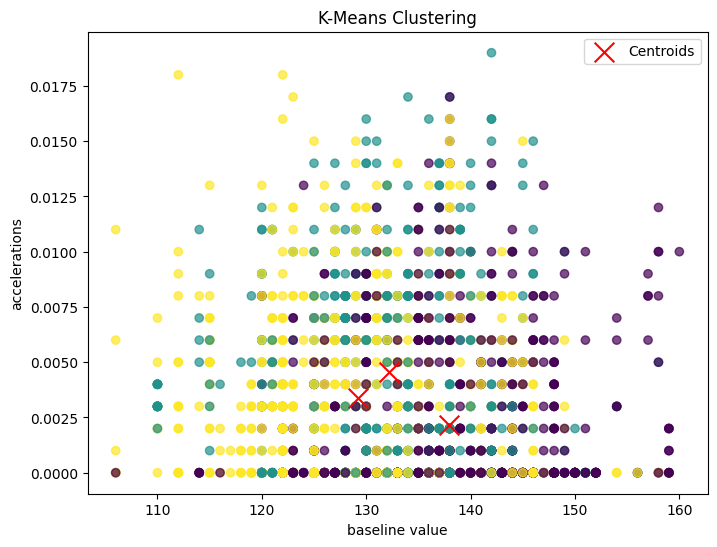

In [ ]:
k=3
model_kmeans=KMeans(n_clusters=k,random_state=42)
numerical_features = df.select_dtypes(include=['number']).drop(columns=['fetal_health'])
df_for_clustering = df[numerical_features.columns]
model_kmeans.fit(df_for_clustering)
cluster_labels=model_kmeans.labels_
cluster_centres=model_kmeans.cluster_centers_
plt.figure(figsize=(8,6))
plt.scatter(df_for_clustering.iloc[:, 0], df_for_clustering.iloc[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.scatter(model_kmeans.cluster_centers_[:, 0], model_kmeans.cluster_centers_[:, 1], marker='x', s=200, color='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel(df_for_clustering.columns[0])  # Label for the first selected feature
plt.ylabel(df_for_clustering.columns[1])  # Label for the second selected feature
plt.legend()
plt.show()


Inertia: 6110135.472979927
Silhouette Score: -6110135.472979927
Davies-Bouldin Score: 1.0532223130703062
Calinski-Harabasz Score: <function calinski_harabasz_score at 0x7ce9348ab370>
Homogenity: 0.034250311501843586
Completeness: 0.03507636009354344
V-Measure: 0.03465841448631258


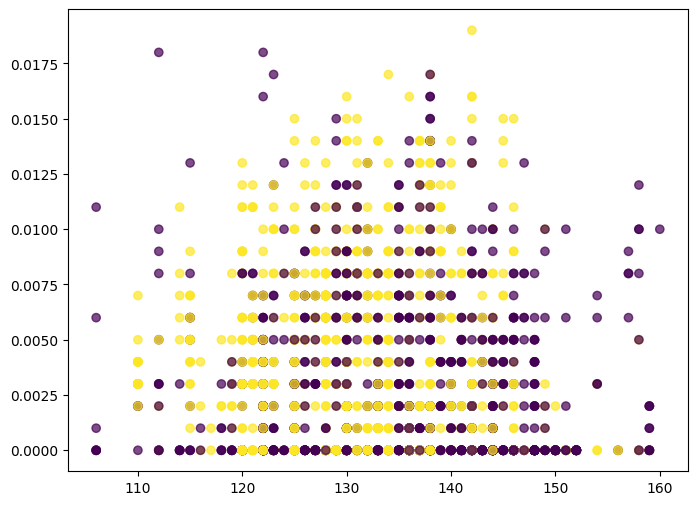

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, homogeneity_score, completeness_score,v_measure_score # Import necessary functions

k=2

model_kmeans=KMeans(n_clusters=k,random_state=42)
model_kmeans.fit(x)
cluster_labels=model_kmeans.labels_

inertia=model_kmeans.inertia_
print('Inertia:',inertia)

silhouette_score=model_kmeans.score(x,cluster_labels)
print('Silhouette Score:',silhouette_score)

davies_bouldin=davies_bouldin_score(x,cluster_labels)
print('Davies-Bouldin Score:',davies_bouldin)

calinski_harabasz=calinski_harabasz_score(x,cluster_labels)
print('Calinski-Harabasz Score:',calinski_harabasz_score)

homogenity=homogeneity_score(cluster_labels,y)
print('Homogenity:',homogenity)

completeness=completeness_score(cluster_labels,y)
print('Completeness:',completeness)

v_measure = v_measure_score(cluster_labels,y)
print('V-Measure:',v_measure)

plt.figure(figsize=(8,6))
numerical_features = df.select_dtypes(include=['number']).drop(columns=['fetal_health'])
df_for_clustering = df[numerical_features.columns]
plt.scatter(df_for_clustering.iloc[:, 0], df_for_clustering.iloc[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)


In [ ]:
accuracy_scores = {
    'Linear Regression (Train)': train_r2_lr,
    'Linear Regression (Test)': test_r2_lr,
    'Logistic Regression (Train)': train_accuracy_lr1,
    'Logistic Regression (Test)': test_accuracy_lr1,
    'Decision Tree (Train)': accuracy_train_dt,
    'Decision Tree (Test)': accuracy_test_dt,
    'KNN (Train)': accuracy_train,
    'KNN (Test)': accuracy_test,
}
df = pd.DataFrame(accuracy_scores.items(), columns=['Model', 'Score']).sort_values(by='Score')
pd.set_option('display.float_format', '{:.6f}'.format)
display(df)

,Model,Score
1,Linear Regression (Test),0.542415
0,Linear Regression (Train),0.622517
2,Logistic Regression (Train),0.875672
7,KNN (Test),0.876176
3,Logistic Regression (Test),0.891850
5,Decision Tree (Test),0.921630
6,KNN (Train),0.924059
4,Decision Tree (Train),1.000000


In [ ]:
new_features = [132.000000, 0.007000, 0.000000, 0.008000, 0.000000, 0.000000, 0.000000, 16.000000, 2.400000, 0.000000, 19.9, 117, 53.000000, 170.000000, 9.000000, 0.000000, 137.000000, 136.000000, 138.000000, 11.000000, 1.000000]
# Reshape new_features to a 2D array with one row and multiple columns
new_features = np.array(new_features).reshape(1, -1)

predicted_health = model_lr.predict(new_features)
print("predicted fetal health is ", predicted_health)

predicted_health = model_lr1.predict(new_features)
print("predicted fetal health is ", predicted_health)

predicted_health = model_dt.predict(new_features)
print("predicted fetal health is ", predicted_health)

predicted_health = model_knn.predict(new_features)
print("predicted fetal health is ", predicted_health)

predicted_health = model_kmeans.predict(new_features)
print("predicted fetal health is ", predicted_health)

predicted fetal health is  [0.74172928]
predicted fetal health is  [1.]
predicted fetal health is  [1.]
predicted fetal health is  [1.]
predicted fetal health is  [1]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
